# Visualization Wordvectors

### Import data and binary glove model saved in form of .npy format

In [2]:
import numpy as np 
import os 
import tensorflow as tf
import matplotlib.pyplot as plt 
from sklearn.manifold import TSNE
import seaborn as sns
sns.set()

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning:


examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.



### Load word_vector

In [4]:
wordsList = np.load('data/wordsList.npy')
print('Loaded the word list!')
wordsList = wordsList.tolist() #Originally loaded as numpy array
wordsList = [word.decode('UTF-8') for word in wordsList] #Encode words as UTF-8
wordVectors = np.load('data/wordVectors.npy')
print ('Loaded the word vectors!')

Loaded the word list!
Loaded the word vectors!


In [4]:
max_num_words=4000

In [5]:
print(len(wordsList))
print(wordVectors.shape)

400000
(400000, 50)


In [6]:
baseballIndex = wordsList.index('baseball')
wordVectors[baseballIndex]

array([-1.9327  ,  1.0421  , -0.78515 ,  0.91033 ,  0.22711 , -0.62158 ,
       -1.6493  ,  0.07686 , -0.5868  ,  0.058831,  0.35628 ,  0.68916 ,
       -0.50598 ,  0.70473 ,  1.2664  , -0.40031 , -0.020687,  0.80863 ,
       -0.90566 , -0.074054, -0.87675 , -0.6291  , -0.12685 ,  0.11524 ,
       -0.55685 , -1.6826  , -0.26291 ,  0.22632 ,  0.713   , -1.0828  ,
        2.1231  ,  0.49869 ,  0.066711, -0.48226 , -0.17897 ,  0.47699 ,
        0.16384 ,  0.16537 , -0.11506 , -0.15962 , -0.94926 , -0.42833 ,
       -0.59457 ,  1.3566  , -0.27506 ,  0.19918 , -0.36008 ,  0.55667 ,
       -0.70315 ,  0.17157 ], dtype=float32)

In [11]:
wordsList[12:25]

['that',
 'on',
 'is',
 'was',
 'said',
 'with',
 'he',
 'as',
 'it',
 'by',
 'at',
 '(',
 ')']

In [18]:
def tsne_plot(wordvector,wordlist,number=1000,fsize=36):
    "Creates and TSNE model and plots it"
    labels = wordsList[:number]
    tokens = wordVectors[:number]


    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(fsize, fsize)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

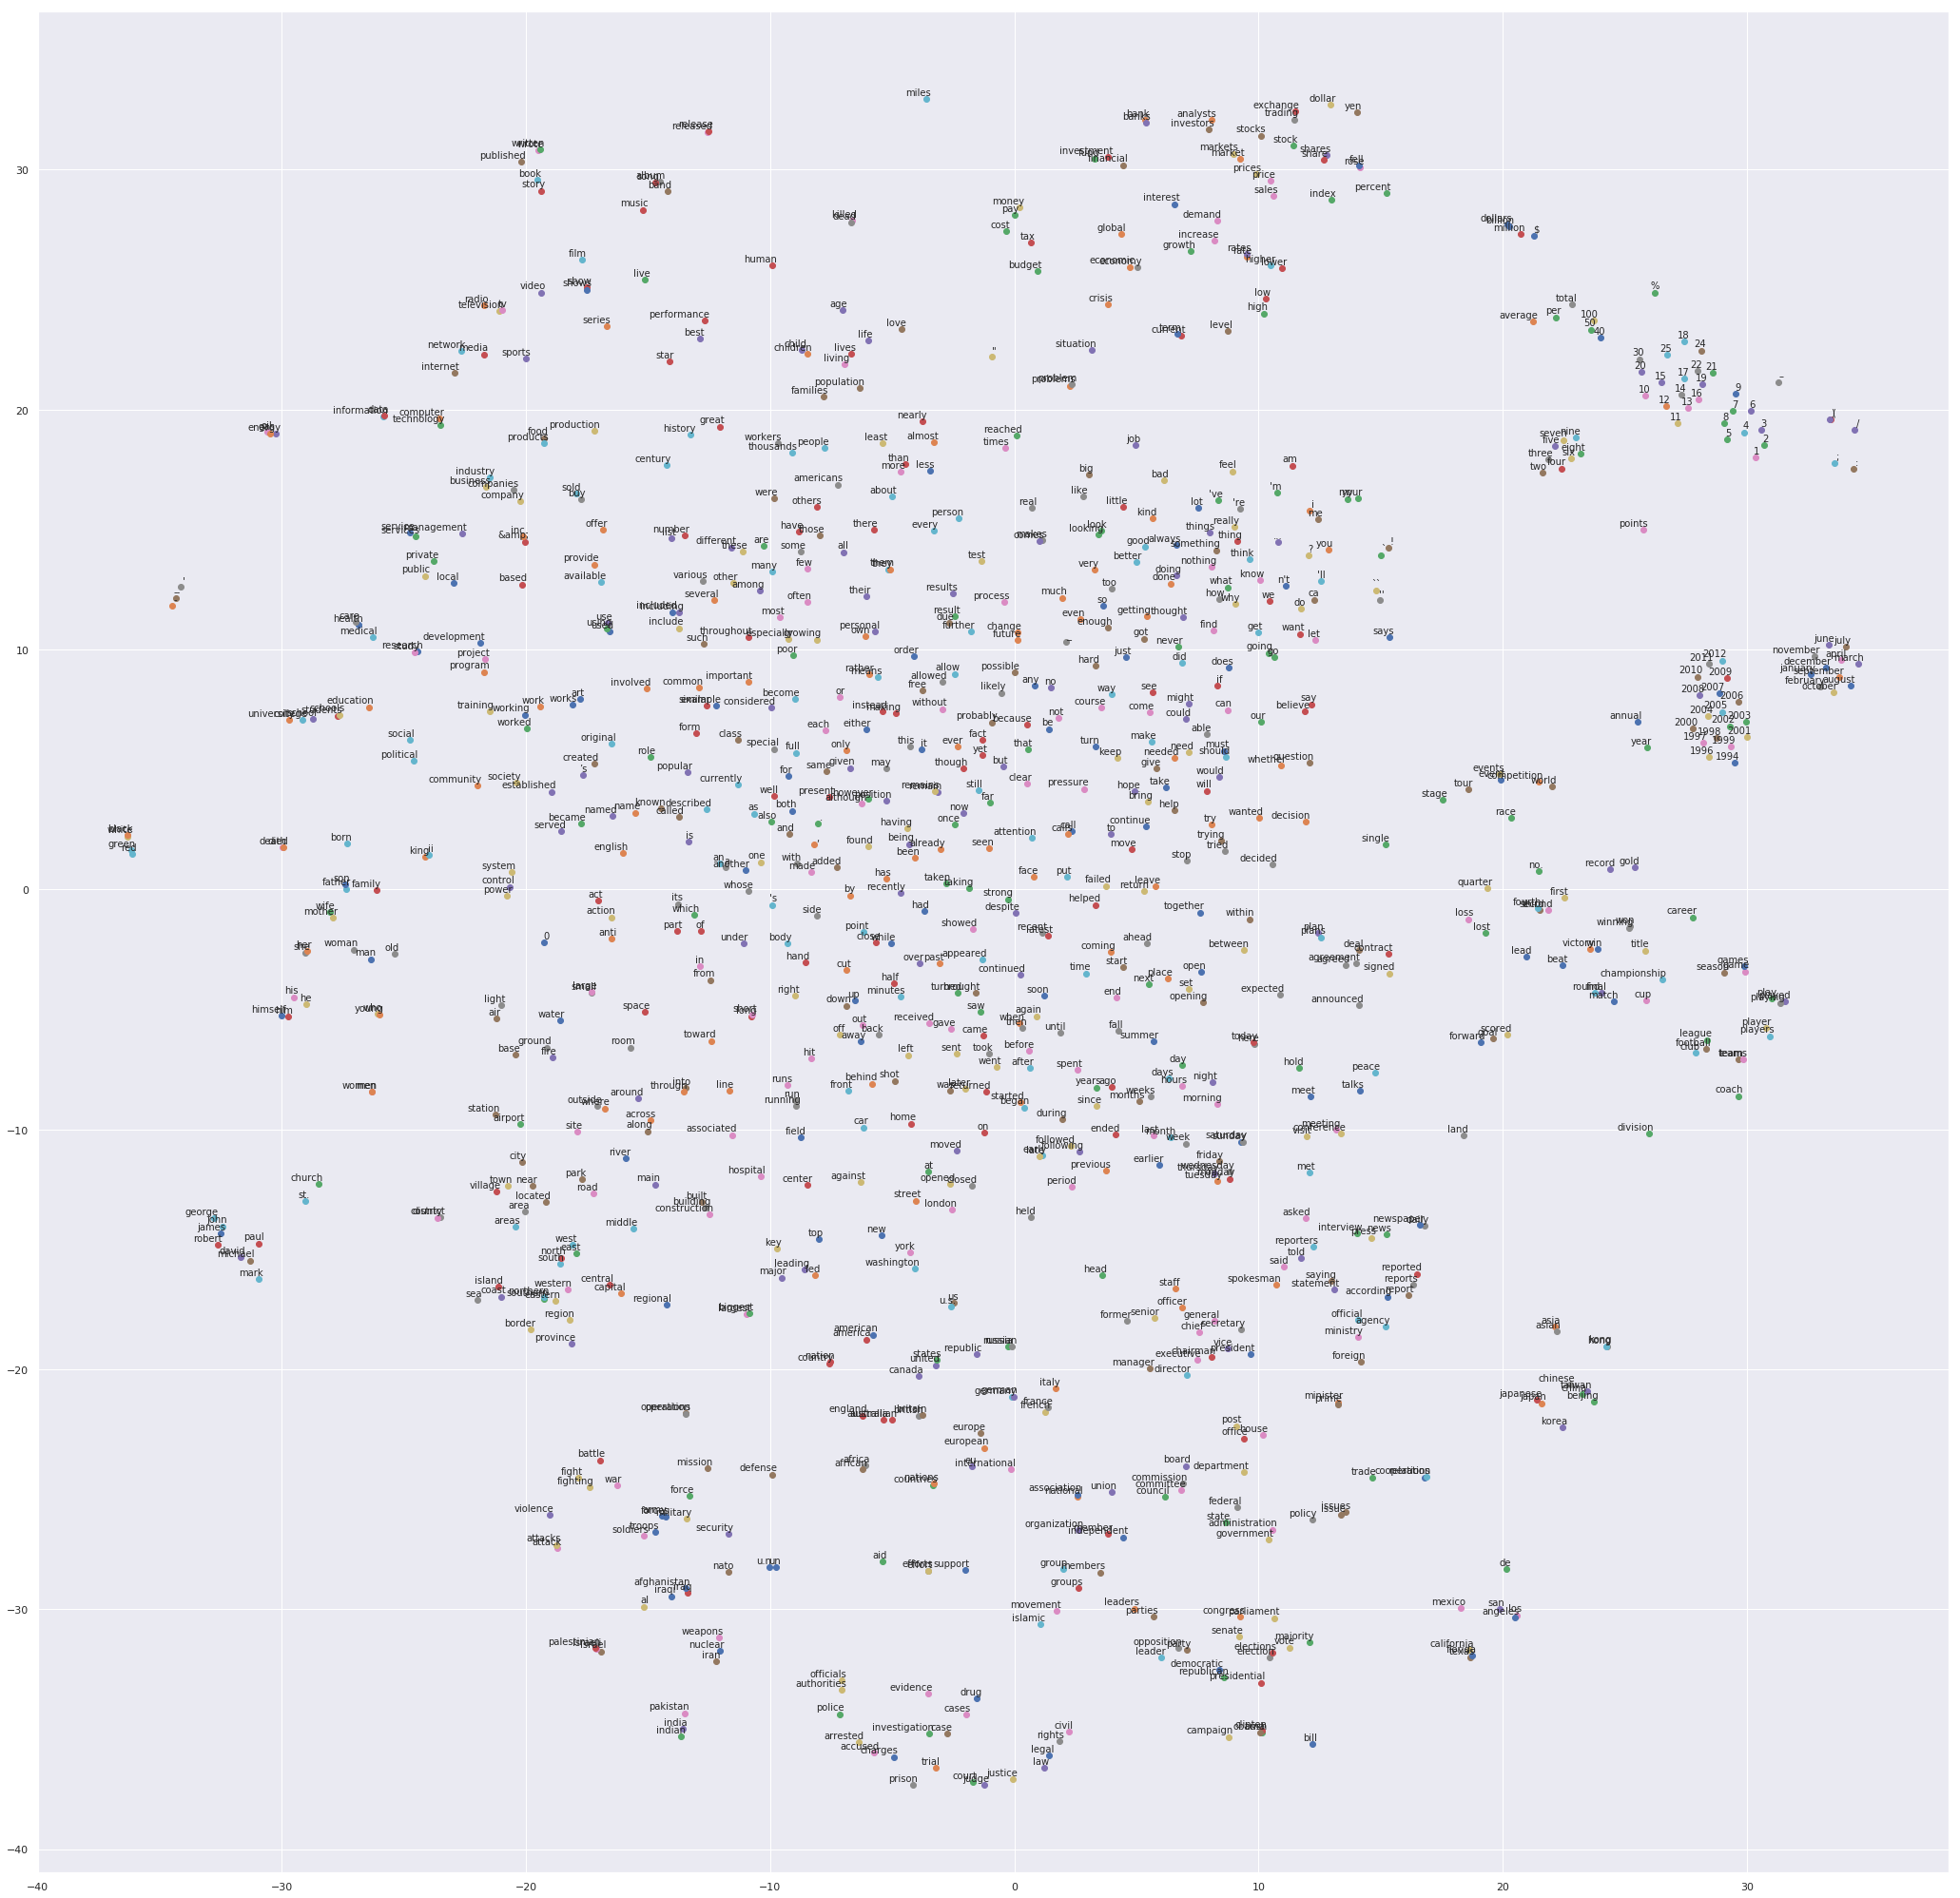

In [19]:
tsne_plot(wordVectors,wordsList)

In [6]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)


tsne = TSNE(n_components=2, init='random', random_state=0)
trans_data = tsne.fit_transform(wordVectors[2200:2500])
N=1
print(trans_data.shape)
#c= ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 360, N)]
trace = go.Scatter(x=trans_data[:,0], y=trans_data[:,1],marker=dict(color = np.random.randn(500)),
                   mode='markers', text=wordsList[2200:2500],textposition='bottom center',)
d=[trace]

layout = go.Layout(
    showlegend=True
)

fig = go.Figure(data=d, layout=layout)

iplot(fig)
#titles.append("t-SNE (%.2g sec)" % (t1 - t0))

(300, 2)
